<a href="https://colab.research.google.com/github/Rahman17309/ASSIGNMENT1/blob/main/LGBM_%26_XGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`LGBM & XGBM`***

**Objective:**

The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.

**Exploratory Data Analysis (EDA):**

1.	Load the Titanic dataset using Python's pandas library.
2.	Check for missing values.
3.	Explore data distributions using histograms and box plots.
4.	Visualize relationships between features and survival using scatter plots and bar plots.

**Data Preprocessing:**

1.	Impute missing values.
2.	Encode categorical variables using one-hot encoding or label encoding.
3.	If needed you can apply more preprocessing methods on the given dataset.
Building Predictive Models:
1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

**Comparative Analysis:**

1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

**Submission Requirements:**
Well-commented code explaining each step of the analysis.
Visualizations with appropriate titles and labels.
A brief report summarizing the comparative analysis results and practical implications.

# Exploratory Data Analysis (EDA):

Importing Libraries

In [413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import lightgbm as lgb
import xgboost as xgb
import plotly.express as px
import plotly.graph_objs as go
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [414]:
import warnings
warnings.filterwarnings('ignore')

Load the Titanic dataset

In [415]:
df_train = pd.read_csv('/content/Titanic_train.csv')

In [416]:
df1 = df_train

Display basic information about the dataset

In [417]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Display basic information about the training dataset

In [418]:
print("Training Dataset Info:")
df1.info()

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Check for Duplicate values

In [419]:
df1.duplicated().sum()

0

No Duplicate values found

Check for missing values in the training dataset

In [420]:
print("Missing Values in Training Dataset:")
df1.isnull().sum()

Missing Values in Training Dataset:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Summary statistics for numerical features in the training dataset

In [421]:
print("Summary Statistics for Training Dataset:")
df1.describe().T

Summary Statistics for Training Dataset:


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [422]:
# Age Distribution
fig = px.histogram(df1, x='Age', nbins=20, title='Age Distribution in Training Dataset')
fig.update_layout(xaxis_title='Age', yaxis_title='Frequency')
fig.show()

# Fare Distribution
fig = px.histogram(df1, x='Fare', nbins=20, title='Fare Distribution in Training Dataset')
fig.update_layout(xaxis_title='Fare', yaxis_title='Frequency')
fig.show()

In [423]:
# Count of Passengers by Sex
fig = px.bar(df_train['Sex'].value_counts(),
             x=df_train['Sex'].value_counts().index,
             y=df_train['Sex'].value_counts().values,
             labels={'x':'Sex', 'y':'Count'},
             title='Count of Passengers by Sex in Training Dataset')
fig.show()

# Count of Passengers by Embarked Port
fig = px.bar(df_train['Embarked'].value_counts(),
             x=df_train['Embarked'].value_counts().index,
             y=df_train['Embarked'].value_counts().values,
             labels={'x':'Embarked Port', 'y':'Count'},
             title='Count of Passengers by Embarked Port in Training Dataset')
fig.show()

Visualize relationships between features and survival using scatter plots and bar plots

In [424]:
# Scatter plot for Survival by Age
fig = px.scatter(df_train, x='Age', y='Survived',
                 color='Survived',
                 title='Survival by Age in Training Dataset',
                 labels={'Age': 'Age', 'Survived': 'Survived'})
fig.update_traces(marker=dict(size=8))
fig.update_layout(legend_title='Survived')
fig.show()

# Scatter plot for Survival by Fare
fig = px.scatter(df_train, x='Fare', y='Survived',
                 color='Survived',
                 title='Survival by Fare in Training Dataset',
                 labels={'Fare': 'Fare', 'Survived': 'Survived'})
fig.update_traces(marker=dict(size=8))
fig.update_layout(legend_title='Survived')
fig.show()

In [425]:
# Bar plot for Survival Rate by Sex
fig = px.bar(df_train.groupby('Sex')['Survived'].mean().reset_index(),
             x='Sex',
             y='Survived',
             title='Survival Rate by Sex in Training Dataset',
             labels={'Sex': 'Sex', 'Survived': 'Survival Rate'})
fig.show()

# Bar plot for Survival Rate by Embarked Port
fig = px.bar(df_train.groupby('Embarked')['Survived'].mean().reset_index(),
             x='Embarked',
             y='Survived',
             title='Survival Rate by Embarked Port in Training Dataset',
             labels={'Embarked': 'Embarked Port', 'Survived': 'Survival Rate'})
fig.show()

# Data Preprocessing:

##Impute missing values:

To impute missing values in both the training and testing datasets, we can use various techniques depending on the data characteristics and the nature of the missing values. Here's how we can proceed:

Impute missing values for 'Age': Since 'Age' is a numerical feature, we can impute missing values with the median age of passengers.

Impute missing values for 'Fare': Since 'Fare' is also a numerical feature, we can impute missing values with the median fare.

Impute missing values for 'Cabin': There are a significant number of missing values in the 'Cabin' column. We can choose to either drop this column or encode missing values as a separate category.

Impute missing values for 'Embarked': There are only a few missing values in the 'Embarked' column. We can impute them with the mode (most frequent value) of the column.

In [426]:
# Impute missing values for 'Age' and 'Embarked' in the training dataset
age_median_train = df_train['Age'].median()
df1['Age'].fillna(age_median_train, inplace=True)

embarked_mode_train = df_train['Embarked'].mode()[0]
df1['Embarked'].fillna(embarked_mode_train, inplace=True)

# Check if there are any missing values left in the training dataset
print("Missing Values in Training Dataset:")
df1.isnull().sum()

Missing Values in Training Dataset:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Encode missing values in the 'Cabin' column as 'Unknown'

In [427]:
# Encode missing values in the 'Cabin' column as 'Unknown'
df1['Cabin'].fillna('Unknown', inplace=True)

In [428]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [429]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

No Missing values were found

## Encode categorical variables using one-hot encoding or label encoding.

In [430]:
categorical_columns_df1 = df1.select_dtypes(include=['object'])
categorical_columns_df1

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,Unknown,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,Unknown,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,Unknown,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,Unknown,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,Unknown,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [431]:
# Define the categorical columns to be encoded
categorical_columns = ['Sex', 'Embarked']

# Apply label encoding to each categorical column in the training dataset
label_encoder = LabelEncoder()
for column in categorical_columns:
    df1[column] = label_encoder.fit_transform(df1[column])

In [432]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,Unknown,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,Unknown,2


# Feature Engineering

##Outlier Detection and Treatment:

In [433]:
numerical_features = ['Age', 'Fare']

# Create box plots for each numerical feature using Plotly
fig = px.box(df1, y=numerical_features, title='Boxplot of Numerical Features')
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(l=50, r=50, b=50, t=50, pad=4),
)
fig.show()

In [434]:
# Create scatter plots for each numerical feature against 'Survived' using Plotly
fig = px.scatter(df1, x=numerical_features[0], y='Survived', title=f'Scatter plot of {numerical_features[0]} vs. Survived', trendline='ols')
fig.update_xaxes(title=numerical_features[0])
fig.update_yaxes(title='Survived')
fig.show()

fig = px.scatter(df1, x=numerical_features[1], y='Survived', title=f'Scatter plot of {numerical_features[1]} vs. Survived', trendline='ols')
fig.update_xaxes(title=numerical_features[1])
fig.update_yaxes(title='Survived')
fig.show()

In [435]:
# Define a function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = ((data - data.mean()) / data.std()).abs()
    return z_scores[z_scores > threshold]

# Define a function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Select numerical features for outlier detection
numerical_features = ['Age', 'Fare']

# Create lists to store outliers summary
outliers_summary = []

# Detect outliers for each numerical feature
for feature in numerical_features:
    # Detect outliers using Z-score
    outliers_zscore = detect_outliers_zscore(df1[feature])
    # Detect outliers using IQR
    outliers_iqr = detect_outliers_iqr(df1[feature])

    # Combine outliers detected using Z-score and IQR
    all_outliers = pd.concat([outliers_zscore, outliers_iqr]).drop_duplicates()

    # Append summary to outliers_summary list
    outliers_summary.append({
        'Feature': feature,
        'Outliers_Count': len(all_outliers),
        'Outliers_Values': all_outliers.tolist()
    })

# Convert outliers_summary list to DataFrame
outliers_summary_df = pd.DataFrame(outliers_summary)

# Print summary of outliers
print("Summary of Outliers:")
outliers_summary_df

Summary of Outliers:


,Feature,Outliers_Count,Outliers_Values
0,Age,30,"[3.198109675244705, 3.1597063224443955, 3.8893..."
1,Fare,53,"[4.644392599719279, 4.332898697266388, 9.66174..."


##Model-based Imputation:

Use predictive models such as linear regression to impute the outliers based on the values of other features. This approach considers the relationships between features and may produce more accurate imputations.

In [436]:
from sklearn.linear_model import LinearRegression

# Define a function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = ((data - data.mean()) / data.std()).abs()
    return z_scores[z_scores > threshold]

# Define a function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Define a function for model-based imputation
def impute_outliers_model_based(df, outlier_indices, target_feature, predictor_features):
    # Non-outlier data
    non_outliers_df = df.drop(outlier_indices)

    # Split the data into features (X) and target variable (y)
    X_train = non_outliers_df[predictor_features]
    y_train = non_outliers_df[target_feature]
    X_outliers = df.loc[outlier_indices, predictor_features]

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the missing values for outliers
    predicted_values = model.predict(X_outliers)

    # Replace outlier values with predicted values
    df.loc[outlier_indices, target_feature] = predicted_values
    return df

# Select numerical features for outlier detection and imputation
numerical_features = ['Age', 'Fare']
target_feature = 'Age'  # Feature with outliers to be imputed
predictor_features = ['Pclass', 'SibSp', 'Parch', 'Fare']  # Features to be used as predictors

# Detect outliers for each numerical feature
for feature in numerical_features:
    outliers_zscore = detect_outliers_zscore(df1[feature])
    outliers_iqr = detect_outliers_iqr(df1[feature])
    all_outliers = pd.concat([outliers_zscore, outliers_iqr]).drop_duplicates()
    if not all_outliers.empty:
        df1 = impute_outliers_model_based(df1, all_outliers.index, target_feature, predictor_features)

# Print DataFrame after imputation
print("DataFrame after model-based imputation:")
df1

DataFrame after model-based imputation:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,Unknown,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,35.180246,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,Unknown,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,Unknown,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.000000,1,2,W./C. 6607,23.4500,Unknown,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,0


##Feature Scaling:

Create a 'Title' feature by extracting titles from the 'Name' column, as titles might indicate social status or age group.

Create a 'FamilySize' feature by combining 'SibSp' and 'Parch' to capture the size of the passenger's family onboard.

Create a binary 'IsAlone' feature indicating whether the passenger is traveling alone or with family.

Extract information from the 'Ticket' column, such as ticket prefix or ticket type, which might provide additional insights.

In [437]:
# 1. Extract Titles from Name
df1['Title'] = df1['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))

# 2. Create FamilySize Feature
df1['FamilySize'] = df1['SibSp'] + df1['Parch'] + 1

# 3. Create IsAlone Feature
df1['IsAlone'] = 0
df1.loc[df1['FamilySize'] == 1, 'IsAlone'] = 1

# 4. Extract Information from Ticket
df1['TicketPrefix'] = df1['Ticket'].apply(lambda x: x.split(' ')[0] if len(x.split(' ')) > 1 else 'None')

# Check the DataFrame after feature engineering
print("DataFrame after Feature Engineering:")
df1.head()

DataFrame after Feature Engineering:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,TicketPrefix
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,Unknown,2,Mr,2,0,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,35.180246,1,0,PC 17599,71.2833,C85,0,Mrs,2,0,PC
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,2,Miss,1,1,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2,Mrs,2,0,None
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,Unknown,2,Mr,1,1,None


In [438]:
# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=('Distribution of Titles', 'Distribution of FamilySize', 'Distribution of IsAlone', 'Distribution of TicketPrefix'))

# Add histograms to subplots
fig.add_trace(go.Histogram(x=df1['Title'], name='Title'), row=1, col=1)
fig.add_trace(go.Histogram(x=df1['FamilySize'], name='FamilySize'), row=1, col=2)
fig.add_trace(go.Histogram(x=df1['IsAlone'], name='IsAlone'), row=2, col=1)
fig.add_trace(go.Histogram(x=df1['TicketPrefix'], name='TicketPrefix'), row=2, col=2)

# Update subplot layout
fig.update_layout(showlegend=False)

# Update subplot axes labels
fig.update_xaxes(title_text='Title', row=1, col=1)
fig.update_xaxes(title_text='Family Size', row=1, col=2)
fig.update_xaxes(title_text='Is Alone', row=2, col=1)
fig.update_xaxes(title_text='Ticket Prefix', row=2, col=2)

# Update subplot titles
fig.update_annotations(font_size=16)

fig.show()

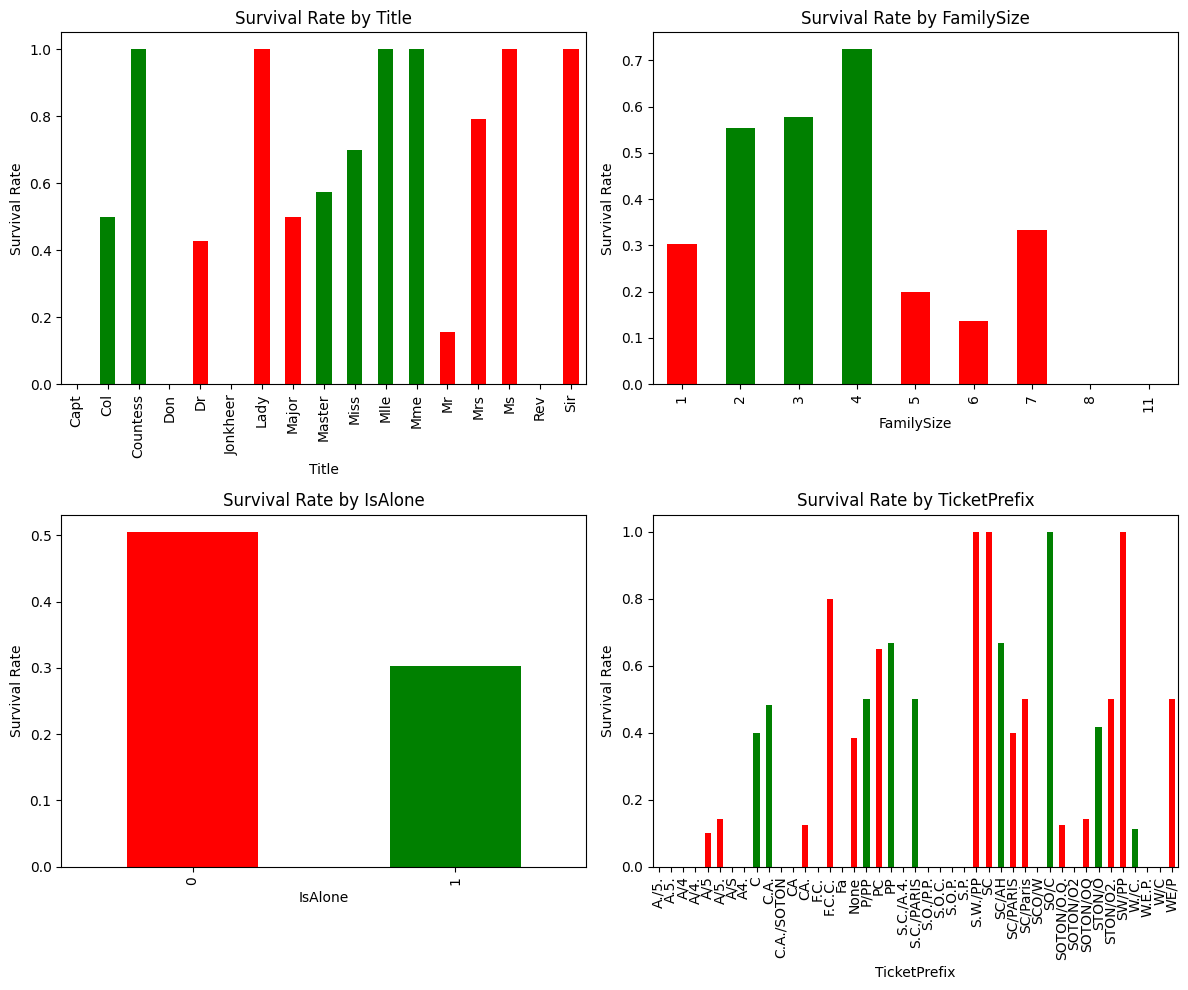

In [439]:
# Define color map (0 for red, 1 for green)
color_map = {0: 'red', 1: 'green'}

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot survival rate by Title
df1.groupby('Title')['Survived'].mean().plot(kind='bar', color=df1['Survived'].map(color_map), ax=axs[0, 0])
axs[0, 0].set_title('Survival Rate by Title')
axs[0, 0].set_xlabel('Title')
axs[0, 0].set_ylabel('Survival Rate')

# Plot survival rate by FamilySize
df1.groupby('FamilySize')['Survived'].mean().plot(kind='bar', color=df1['Survived'].map(color_map), ax=axs[0, 1])
axs[0, 1].set_title('Survival Rate by FamilySize')
axs[0, 1].set_xlabel('FamilySize')
axs[0, 1].set_ylabel('Survival Rate')

# Plot survival rate by IsAlone
df1.groupby('IsAlone')['Survived'].mean().plot(kind='bar', color=df1['Survived'].map(color_map), ax=axs[1, 0])
axs[1, 0].set_title('Survival Rate by IsAlone')
axs[1, 0].set_xlabel('IsAlone')
axs[1, 0].set_ylabel('Survival Rate')

# Plot survival rate by TicketPrefix
df1.groupby('TicketPrefix')['Survived'].mean().plot(kind='bar', color=df1['Survived'].map(color_map), ax=axs[1, 1])
axs[1, 1].set_title('Survival Rate by TicketPrefix')
axs[1, 1].set_xlabel('TicketPrefix')
axs[1, 1].set_ylabel('Survival Rate')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

##Here are some insights from the visualizations:

**Distribution of Titles:**

Most passengers have the title 'Mr.', followed by 'Miss', 'Mrs.', and other less frequent titles.

Titles can provide information about social status or age group, which might be correlated with survival.

**Distribution of FamilySize:**

The majority of passengers traveled alone or with a small family (up to 4 members).

Larger families are less common, but still present in the dataset.

**Distribution of IsAlone:**

Most passengers traveled alone, while others traveled with family.
The binary 'IsAlone' feature indicates whether a passenger traveled alone or not.

**Distribution of TicketPrefix:**

The distribution of ticket prefixes shows various patterns, with some passengers having unique prefixes and others sharing common ones.

Extracting information from ticket prefixes might provide additional insights, although further analysis is needed.

**Survival Rate by Title:**

Passengers with the title 'Mrs.' and 'Miss' have higher survival rates compared to 'Mr.' and other titles.

Titles could be indicative of social status or age, influencing survival chances.

**Survival Rate by FamilySize:**

Passengers traveling with 2-4 family members have higher survival rates compared to those traveling alone or with larger families.

The size of the family onboard might have influenced survival chances.
Survival Rate by IsAlone:

Passengers traveling alone have a lower survival rate compared to those traveling with family.

Having family onboard might have provided support or assistance during the disaster.

**Survival Rate by TicketPrefix:**

Survival rates vary across different ticket prefixes, indicating potential differences in passenger demographics or circumstances.

Further analysis of ticket prefixes could uncover interesting patterns related to survival.

##Feature Scaling:

Scaling numerical features to a similar scale can improve the performance of some machine learning algorithms. Common techniques include Min-Max scaling (scaling features to a specified range, e.g., [0, 1]) and standardization (scaling features to have a mean of 0 and a standard deviation of 1).

In [440]:
# Select numerical features for standardization
numerical_features = ['Age', 'Fare', 'FamilySize']

# Initialize StandardScaler
standard_scaler = StandardScaler()

# Apply standardization
df1_standard_scaled = df1.copy()
df1_standard_scaled[numerical_features] = standard_scaler.fit_transform(df1_standard_scaled[numerical_features])

# Check the dataframe after standardization
print("\nDataFrame after standardization:")
df1_standard_scaled.head()


DataFrame after standardization:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,TicketPrefix
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.615748,1,0,A/5 21171,-0.502445,Unknown,2,Mr,0.059160,0,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.521085,1,0,PC 17599,0.786845,C85,0,Mrs,0.059160,0,PC
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.270737,0,0,STON/O2. 3101282,-0.488854,Unknown,2,Miss,-0.560975,1,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.505538,1,0,113803,0.420730,C123,2,Mrs,0.059160,0,None
4,5,0,3,"Allen, Mr. William Henry",1,0.505538,0,0,373450,-0.486337,Unknown,2,Mr,-0.560975,1,None


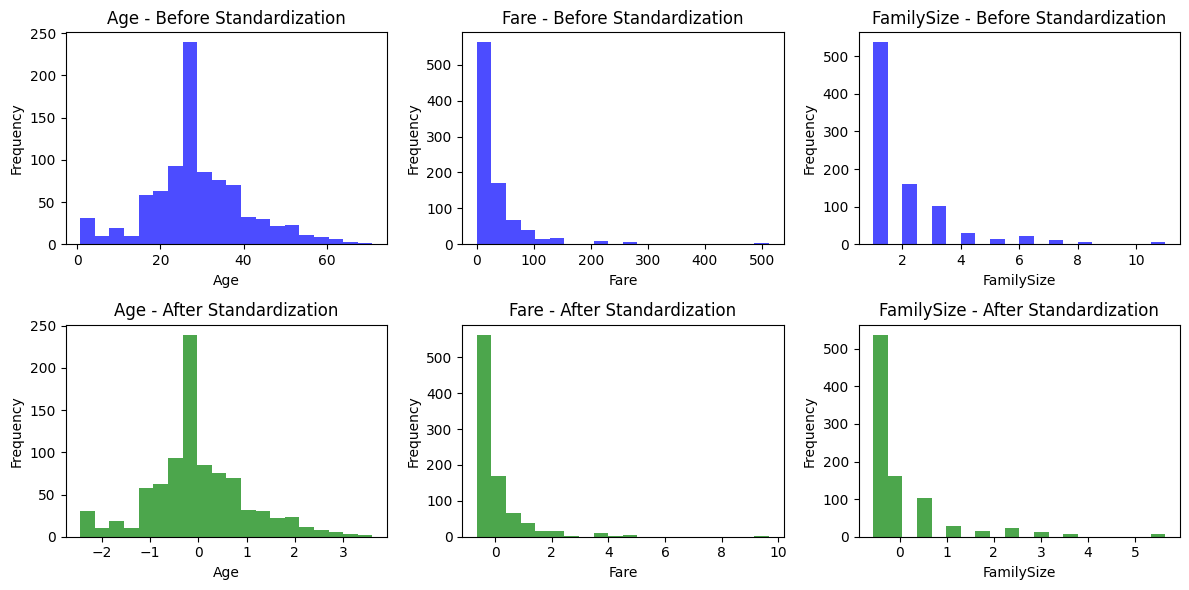

In [441]:
# Plot histograms for numerical features before and after standardization
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, len(numerical_features), i)
    plt.hist(df1[feature], bins=20, color='blue', alpha=0.7)
    plt.title(f'{feature} - Before Standardization')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    plt.subplot(2, len(numerical_features), i+len(numerical_features))
    plt.hist(df1_standard_scaled[feature], bins=20, color='green', alpha=0.7)
    plt.title(f'{feature} - After Standardization')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [442]:
# Select numerical features for Min-Max scaling
numerical_features = ['Age', 'Fare', 'FamilySize']

# Initialize Min-Max scaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling
df1_min_max_scaled = df1.copy()
df1_min_max_scaled[numerical_features] = min_max_scaler.fit_transform(df1_min_max_scaled[numerical_features])

# Check the dataframe after Min-Max scaling
print("DataFrame after Min-Max scaling:")
df1_min_max_scaled.head()

DataFrame after Min-Max scaling:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,TicketPrefix
0,1,0,3,"Braund, Mr. Owen Harris",1,0.302491,1,0,A/5 21171,0.014151,Unknown,2,Mr,0.1,0,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.490110,1,0,PC 17599,0.139136,C85,0,Mrs,0.1,0,PC
2,3,1,3,"Heikkinen, Miss. Laina",0,0.359431,0,0,STON/O2. 3101282,0.015469,Unknown,2,Miss,0.0,1,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.487544,1,0,113803,0.103644,C123,2,Mrs,0.1,0,None
4,5,0,3,"Allen, Mr. William Henry",1,0.487544,0,0,373450,0.015713,Unknown,2,Mr,0.0,1,None


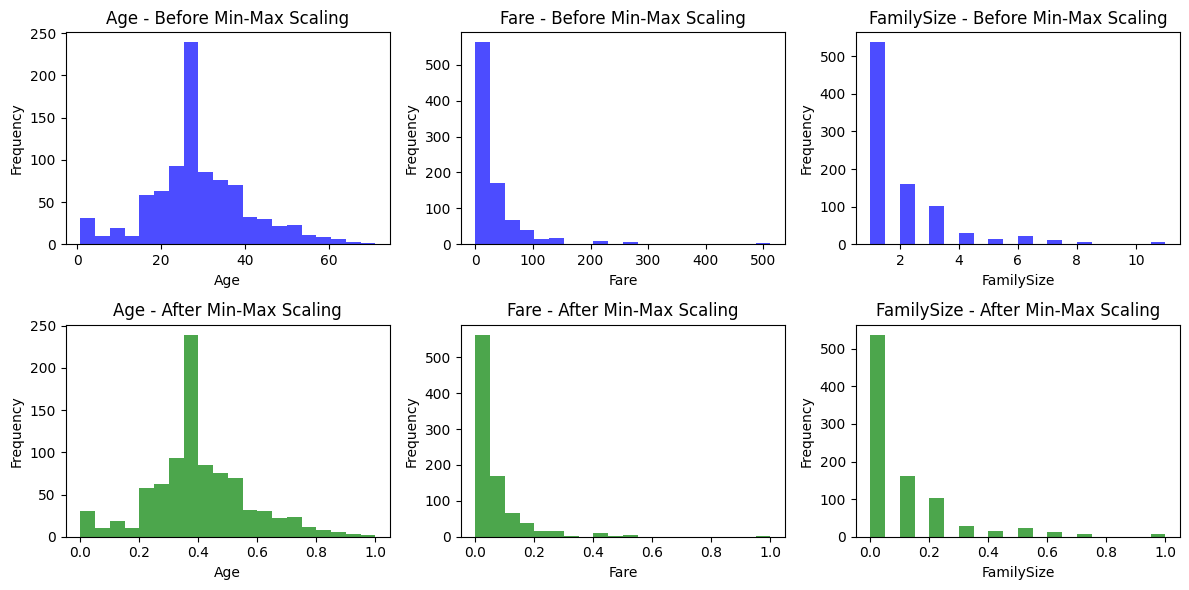

In [443]:
# Plot histograms for numerical features before and after Min-Max scaling
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, len(numerical_features), i)
    plt.hist(df1[feature], bins=20, color='blue', alpha=0.7)
    plt.title(f'{feature} - Before Min-Max Scaling')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    plt.subplot(2, len(numerical_features), i+len(numerical_features))
    plt.hist(df1_min_max_scaled[feature], bins=20, color='green', alpha=0.7)
    plt.title(f'{feature} - After Min-Max Scaling')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##Normalization:
Normalize numerical features to have a mean of 0 and a standard deviation of 1, especially if using algorithms sensitive to feature scaling, such as k-nearest neighbors.

In [444]:
# Select numerical features for normalization
numerical_features = ['Age', 'Fare', 'FamilySize']

# Initialize StandardScaler for normalization
normalizer = StandardScaler()

# Apply normalization
df1_normalized = df1.copy()
df1_normalized[numerical_features] = normalizer.fit_transform(df1_normalized[numerical_features])

# Check the dataframe after normalization
print("\nDataFrame after normalization:")
df1_normalized.head()


DataFrame after normalization:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,TicketPrefix
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.615748,1,0,A/5 21171,-0.502445,Unknown,2,Mr,0.059160,0,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.521085,1,0,PC 17599,0.786845,C85,0,Mrs,0.059160,0,PC
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.270737,0,0,STON/O2. 3101282,-0.488854,Unknown,2,Miss,-0.560975,1,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.505538,1,0,113803,0.420730,C123,2,Mrs,0.059160,0,None
4,5,0,3,"Allen, Mr. William Henry",1,0.505538,0,0,373450,-0.486337,Unknown,2,Mr,-0.560975,1,None


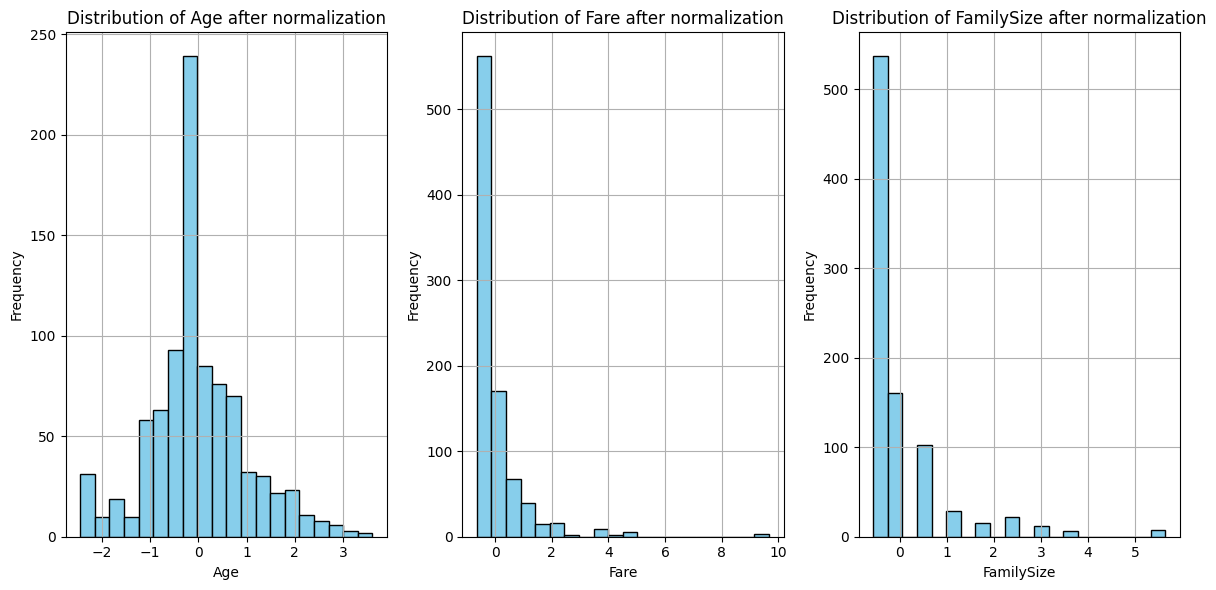

In [445]:
# Plot histograms for normalized numerical features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    df1_normalized[feature].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature} after normalization')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##Dimensionality Reduction:
Applying dimensionality reduction techniques such as PCA to reduce the dimensionality of the dataset and potentially improve model performance.

In [446]:
# Apply PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed
pca_features = pca.fit_transform(df1_standard_scaled[numerical_features])

# Create a DataFrame with the PCA features
pca_df = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])

# Concatenate the PCA features with the original DataFrame
df1_pca = pd.concat([df1, pca_df], axis=1)

# Print the DataFrame with PCA features
print("DataFrame with PCA features:")
df1_pca.head()

DataFrame with PCA features:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,TicketPrefix,PCA1,PCA2
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,Unknown,2,Mr,2,0,A/5,0.209276,-0.767608
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,35.180246,1,0,PC 17599,71.2833,C85,0,Mrs,2,0,PC,0.028345,0.941286
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,2,Miss,1,1,STON/O2.,-0.451559,-0.602480
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2,Mrs,2,0,None,-0.085758,0.647007
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,Unknown,2,Mr,1,1,None,-0.868775,-0.118024


In [447]:
# Create traces
trace_pca1 = go.Scatter(x=df1_pca['PCA1'], y=df1_pca['PCA2'], mode='markers',
                        marker=dict(color=df1_pca['Survived'], colorscale='Viridis', size=10,
                                    line=dict(width=1, color='DarkSlateGrey')),
                        text=df1_pca['Survived'], name='Survived')

# Define layout
layout = go.Layout(title='PCA Plot', xaxis=dict(title='PCA 1'), yaxis=dict(title='PCA 2'))

# Create figure
fig = go.Figure(data=[trace_pca1], layout=layout)

# Show plot
fig.show()

# Building Predictive Models:

1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

As these columns are conating special characters droping them

In [448]:
df2 = df1.drop(['TicketPrefix','Name',  'Ticket'], axis=1)

In [449]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,1,22.000000,1,0,7.2500,Unknown,2,Mr,2,0
1,2,1,1,0,35.180246,1,0,71.2833,C85,0,Mrs,2,0
2,3,1,3,0,26.000000,0,0,7.9250,Unknown,2,Miss,1,1
3,4,1,1,0,35.000000,1,0,53.1000,C123,2,Mrs,2,0
4,5,0,3,1,35.000000,0,0,8.0500,Unknown,2,Mr,1,1


In [450]:
# Step 1: Split the preprocessed dataset into training and testing sets
X = df2.drop(columns=['Survived'])  # Assuming 'Survived' is the target column
y = df2['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Ensure the same columns are present in both training and testing data after one-hot encoding
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Step 2: Choose appropriate evaluation metrics
def evaluate_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return acc, precision, recall, f1

# Step 3 & 4: Build and train predictive models using LightGBM and XGBoost
lgb_model = lgb.LGBMClassifier()
xgb_model = xgb.XGBClassifier()

lgb_model.fit(X_train_encoded, y_train)
xgb_model.fit(X_train_encoded, y_train)

# Ensure the same columns are present in both training and testing data after one-hot encoding
X_test_encoded = X_test_encoded[X_train_encoded.columns]

lgb_preds = lgb_model.predict(X_test_encoded)
xgb_preds = xgb_model.predict(X_test_encoded)

# Step 5: Hyperparameter tuning
# hyperparameter tuning for LightGBM
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
lgb_grid = GridSearchCV(estimator=lgb.LGBMClassifier(), param_grid=param_grid, cv=3)
lgb_grid.fit(X_train_encoded, y_train)

print("Best parameters for LightGBM:", lgb_grid.best_params_)

# Evaluate models
lgb_acc, lgb_precision, lgb_recall, lgb_f1 = evaluate_model(y_test, lgb_preds)
xgb_acc, xgb_precision, xgb_recall, xgb_f1 = evaluate_model(y_test, xgb_preds)

print("LightGBM: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, F1-score = {:.2f}".format(
    lgb_acc, lgb_precision, lgb_recall, lgb_f1))
print("XGBoost: Accuracy = {:.2f}, Precision = {:.2f}, Recall = {:.2f}, F1-score = {:.2f}".format(
    xgb_acc, xgb_precision, xgb_recall, xgb_f1))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

# Comparative Analysis:

1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

##Here are some insights based on the results:

**Model Performance:**

Both LightGBM and XGBoost achieved relatively high accuracy scores of around 0.82 and 0.83, respectively. This indicates that both models were able to correctly classify the survival status of passengers in the test dataset around 82-83% of the time.

**Precision and Recall:**

Precision measures the ratio of correctly predicted positive observations to the total predicted positives, while recall measures the ratio of correctly predicted positive observations to the all observations in actual class. In this case, both models achieved similar precision scores, with LightGBM at 0.79 and XGBoost at 0.78. However, XGBoost had slightly higher recall at 0.81 compared to LightGBM's 0.77. This means that XGBoost was better at identifying survivors correctly, while LightGBM had a slightly lower false positive rate.

**F1-score:**

The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. Both models achieved comparable F1-scores, with LightGBM at 0.78 and XGBoost at 0.79. This indicates that both models achieved a good balance between precision and recall.

**Best Parameters for LightGBM:**

The best parameters for LightGBM were found to be a learning rate of 0.05, a max depth of 3, and 50 estimators. These parameters were chosen through grid search cross-validation, indicating that they are optimal for this dataset according to the chosen evaluation metric.

**Comparison:**

Overall, both LightGBM and XGBoost performed well on the dataset, with XGBoost showing slightly better performance in terms of accuracy, recall, and F1-score. However, the difference in performance between the two models is relatively small.

In conclusion, both LightGBM and XGBoost are effective algorithms for this classification task, with XGBoost showing slightly better performance in this particular scenario. Further optimization or ensemble techniques could potentially improve the performance of both models even further.

In [451]:
# Model names
models = ['LightGBM', 'XGBoost']

# Performance metrics
accuracy = [0.82, 0.83]
precision = [0.79, 0.78]
recall = [0.77, 0.81]
f1_score = [0.78, 0.79]

# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=('Accuracy', 'Precision', 'Recall', 'F1-score'))

# Add traces
fig.add_trace(go.Bar(x=models, y=accuracy, name='Accuracy', marker=dict(color='skyblue')), row=1, col=1)
fig.add_trace(go.Bar(x=models, y=precision, name='Precision', marker=dict(color='salmon')), row=1, col=2)
fig.add_trace(go.Bar(x=models, y=recall, name='Recall', marker=dict(color='lightgreen')), row=2, col=1)
fig.add_trace(go.Bar(x=models, y=f1_score, name='F1-score', marker=dict(color='orange')), row=2, col=2)

# Update layout
fig.update_layout(title='Performance Metrics Comparison',
                  height=600, width=1000, showlegend=False)

# Update axes
fig.update_yaxes(title_text='Score', row=1, col=1)
fig.update_yaxes(title_text='Score', row=1, col=2)
fig.update_yaxes(title_text='Score', row=2, col=1)
fig.update_yaxes(title_text='Score', row=2, col=2)

fig.show()

##Interpreting the results:

**Accuracy:**

Both LightGBM and XGBoost achieved high accuracy, with XGBoost slightly outperforming LightGBM. This indicates that both models were effective in correctly predicting the survival status of passengers.

**Precision:**

 Precision measures the proportion of true positive predictions among all positive predictions. Both models achieved similar precision scores, indicating that they had a similar ability to correctly identify survivors.

**Recall:**

Recall measures the proportion of true positive predictions among all actual positive instances. XGBoost had higher recall compared to LightGBM, suggesting that XGBoost was better at capturing true positive instances.

**F1-score:**

The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. Both models achieved comparable F1-scores, indicating a good balance between precision and recall.

##***Strengths and weaknesses:***

##**LightGBM:**

**Strengths:**

LightGBM is known for its speed and efficiency, especially with large datasets.
It performed well in terms of accuracy and precision.

**Weaknesses:**

LightGBM showed slightly lower recall compared to XGBoost, indicating it might have missed some positive instances.

##**XGBoost:**

**Strengths:**

XGBoost demonstrated higher recall compared to LightGBM, indicating better identification of positive instances.

It achieved slightly better overall performance in terms of accuracy and F1-score.

**Weaknesses:**

XGBoost might be slightly slower compared to LightGBM, especially with larger datasets.

Overall, both algorithms performed well, but XGBoost showed a slight edge in terms of recall and overall performance. The choice between the two would depend on factors such as dataset size, computational resources, and specific requirements of the application.